In [12]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
scipy: 1.1.0
numpy: 1.14.5
matplotlib: 2.2.2
pandas: 0.23.4
sklearn: 0.19.1


In [15]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [16]:
# loading data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = {'sepal-length', 'sepal-width', 'petal-length', 'petal-width','class'}
dataset = read_csv(url, names= names)

In [17]:
# dimensions of dataset
print(dataset.shape)

(150, 5)


In [18]:
# take some data at the csv
print(dataset.head(30))

    sepal-length  petal-width  petal-length  sepal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [19]:
# statistical summary
print(dataset.describe())

       sepal-length  petal-width  petal-length  sepal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [20]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


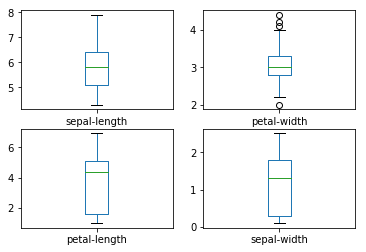

In [28]:
# univariate plots like box and whisker plots
dataset.plot(kind = 'box', subplots= True, layout= (2,2), sharex = False, sharey = False)
pyplot.show()

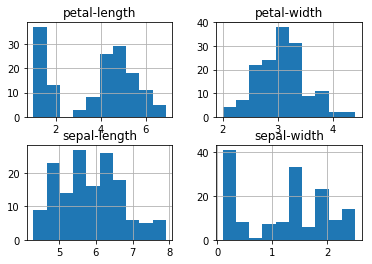

In [29]:
# histogram of variable
dataset.hist()
pyplot.show()

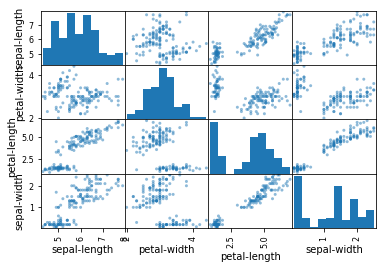

In [30]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [31]:
# create validation dataset
# splitting dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_Validation = train_test_split(X,Y,test_size=0.2, random_state= 2)

In [35]:
# inputting models
# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest neighbors
# Classification and Regression Trees
# Gaussian Naive Bayes
# Support Vector Machines

# Building the models

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma= 'auto')))

In [36]:
# eavluating created models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits= 10, random_state= 1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.965584 (0.058805)
LDA: 0.965584 (0.082242)
KNN: 0.957251 (0.059240)
NB: 0.941775 (0.064589)
SVM: 0.974675 (0.039010)


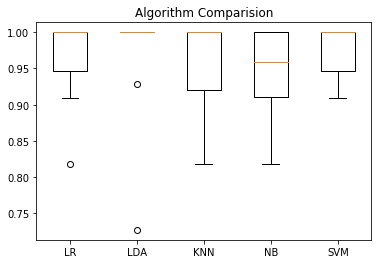

In [37]:
# compare our models
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [38]:
# make prediction on SVM
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [42]:
# evaluate the predictions
print(accuracy_score(Y_Validation, predictions))
print(confusion_matrix(Y_Validation, predictions))
print(classification_report(Y_Validation, predictions))

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.89      1.00      0.94         8

    avg / total       0.97      0.97      0.97        30



In [ ]:
_